 <h1 align="center" style="color:#4ca8ed">
    Обробка та аналіз БМД.<br>
    Группа: БС-81<br>
    Мумінов А.O.<br>
    Практикум Номер 4
</h1>

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
sns.set_style("whitegrid")

<p style="color:#4ca8ed">
    <span style="margin-left:50px;font-size:150%">
        1.Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.
    </span>
</p>

In [2]:
data_var = [];
for i in range(0,6):
    if(i%2 == 0):
        data_var.append(sorted(np.random.normal(0,(i+1),20)))
    else:
        data_var.append(sorted(np.random.exponential(i,20)))

for i in data_var:
    print("РЯДОК - "+ str(i) + "\n")

РЯДОК - [-2.3240407089178032, -1.6297385107302729, -1.453773372158761, -0.9450935183520748, -0.7769464989114837, -0.5924212222188747, -0.45652564677078894, -0.31296190398266144, -0.31200961969542773, -0.010299928248368858, 0.07033716614754992, 0.09474972437553138, 0.396741864158167, 0.44641874181591373, 0.5737325215969898, 0.7202231062248204, 0.9641555127240493, 0.9874101214688278, 1.0783976100491566, 1.4528983728129325]

РЯДОК - [0.03610961083716736, 0.045856146108280565, 0.14158140311642936, 0.14953234026913054, 0.18521194465312132, 0.208762876201513, 0.27436770647658165, 0.33168781688270876, 0.34454927194419815, 0.3975560207413812, 0.43070910747015567, 0.5043182988977042, 0.6424988254622281, 0.6434402205354816, 1.3321344639609718, 1.4269865476799877, 2.1031903210181446, 2.1706256654567055, 2.3305518367565474, 5.3001177817373595]

РЯДОК - [-7.834249312932475, -5.733117514322435, -3.916008989935068, -3.6405246015734045, -3.6130436272030035, -3.085110984014972, -2.689794791036601, -2.1

<p style="color:#4ca8ed">
    <span style="margin-left:50px;font-size:150%">
        2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.
    </span>
</p>

In [3]:
def schapiro_uilk(array,n):
    a = pd.read_excel("Coeficients for the W test for normality.xlsx")[n]/10000
    w_table = pd.read_excel("Рoints of the distribution of W.xlsx")[ 'Unnamed: 1'][n]/1000

    k = int(n/2 if (n%2==0) else (n-1)/2)
    m = np.mean(array)
    nm = 0
    for i in array:
        nm += (i-m)**2

    b = 0
    for i in range(k):
        b += a[i]*(array[n-i-1] - array[i])
    w = (b**2)/nm
    
    if(w > w_table):
        #return ('%.3f'%w) +" normal"
        return "normal"
    else:
        #return ('%.3f'%w) +" non-normal"
        return "non-normal"

<p style="color:#4ca8ed">
    <span style="margin-left:50px;font-size:150%">
        3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.<br>
        <span style = "margin-left:25px;font-size:90%">Variable - назви змінних.<br></span>
        <span style = "margin-left:25px;font-size:90%">Distribution - результати роботи криетрію Шапіро-Уілка<br></span>
         <span style = "margin-left:25px;font-size:90%">Для всіх змінних, що розподілені за нормальним законом - середне значення та стандартне відхилення<br></span>
         <span style = "margin-left:25px;font-size:90%">Для всіх змінних, що розподілені за не нормальним законом - медіану та інтерквартильний розмах<br></span>
    </span>
</p>

(0.0, 1.0, 0.0, 1.0)

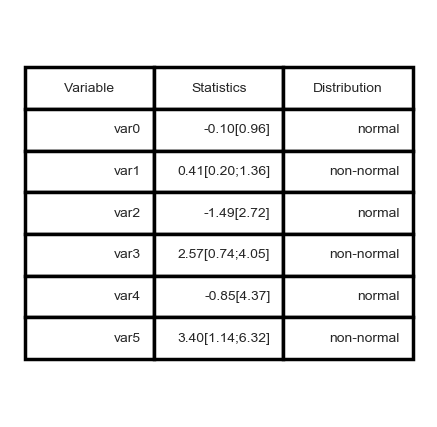

In [4]:
#d = {'x{}'.format(i): range(20) for i in range(3)}
table_st = pd.DataFrame({
    'Variable': [("var"+str(i)) for i in range(6)], 
    'Statistics':
        ['%.2f[%.2f]' % (np.mean(data_var[i]),np.std(data_var[i]))
             if (schapiro_uilk(data_var[i],20)=="normal") else 
         '%.2f[%.2f;%.2f]' % (np.median(data_var[i]), np.quantile(data_var[i],0.25),np.quantile(data_var[i],0.75)) 
         for i in range(6)]
    , 
    'Distribution':[schapiro_uilk(data_var[i],20) for i in range(6)]
})
    
fig = plt.figure(figsize=(2,2), dpi=250)
ax=fig.add_subplot(111)
cell_text = []
for row in range(len(table_st)):
    cell_text.append(table_st.iloc[row])

ax.table(cellText=cell_text, colLabels=table_st.columns, loc='center')
ax.axis('off')

<p style="color:#4ca8ed">
    <span style="margin-left:50px;font-size:150%">
        4. Зберегти таблицю в пдф форматі 
    </span>
</p>

In [5]:
pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
pdf.savefig(fig)
pdf.close()